# Social Media Analysis Notebook

# Project Overview

This notebook investigates the factors that influence **Engagement Rate** for a instagram profile and visualizes engagement rates by different categories. By understanding which factors contribute most to engagement rate, we can provide actionable insights for social media strategists.


We use the **Instagram Analytics Dataset**, which includes details such as media type, like, comments, shares and followers count.
> *link= https://www.kaggle.com/datasets/kundanbedmutha/instagram-analytics-dataset/*

This dataset includes 30,000 Instagram posts with analytics designed to simulate authentic Instagram Insights from the last year. It provides detailed performance metrics like likes, comments, shares, saves, reach, impressions, and engagement rate. The data mirrors realistic algorithm behavior and content performance patterns across Reels, Photos, Videos, and Carousels.

**Key Objectives:**
1.  **Exploratory Data Analysis (EDA):** Identify factors contributing to engagement rate.
2.  **Hypothesis Testing:** Statistically validate assumptions about likes, comments, shares and followers count.
3.  **Business Recommendations:** Provide actionable strategies to improve growth.
4.  **Future Work:** Explore additional models such as sentiment analysis for predictive modelling.


> **Why it matters:** High engagement rate indicates a successful and engaged audience. Identifying factors that drive growth lets social media strategists focus on what works.

---

*Next steps: We will begin by importing necessary libraries and inspecting the dataset.*


## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Setting visualization styles
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')

In [2]:
# Load Dataset from a CSV file
path = "/kaggle/input/instagram-analytics-dataset/Instagram_Analytics.csv"
df = pd.read_csv(path)

# Display first 5 rows
display(df.head())

# Check data types and missing values
df.info()

post_id                 upload_date media_type   likes  comments  shares  \
0  IG0000001  2024-11-30 09:25:22.954916       Reel   31627      7559    4530   
1  IG0000002  2025-08-15 09:25:22.954916      Photo   63206      3490    1680   
2  IG0000003  2025-09-11 09:25:22.954916       Reel   94373      3727    1761   
3  IG0000004  2025-09-18 09:25:22.954916       Reel  172053      7222    2875   
4  IG0000005  2025-03-21 09:25:22.954916      Video   99646      2703    4444   

   saves    reach  impressions  caption_length  hashtags_count  \
0   6393   615036      1007750            1340               3   
1   6809  1237071      1345900            1351              20   
2   8367  1127470      1305369             242              24   
3   9290   764030       897874             446              11   
4   9746     7004       495406            1905               8   

   followers_gained traffic_source  engagement_rate content_category  
0               899      Home Feed             4.97       Technology  
1               805       Hashtags             5.59          Fitness  
2               758     Reels Feed             8.29           Beauty  
3               402       External            21.32            Music  
4               155        Profile            23.52       Technology

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_id           29999 non-null  object 
 1   upload_date       29999 non-null  object 
 2   media_type        29999 non-null  object 
 3   likes             29999 non-null  int64  
 4   comments          29999 non-null  int64  
 5   shares            29999 non-null  int64  
 6   saves             29999 non-null  int64  
 7   reach             29999 non-null  int64  
 8   impressions       29999 non-null  int64  
 9   caption_length    29999 non-null  int64  
 10  hashtags_count    29999 non-null  int64  
 11  followers_gained  29999 non-null  int64  
 12  traffic_source    29999 non-null  object 
 13  engagement_rate   29999 non-null  float64
 14  content_category  29999 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 3.4+ MB


> Our goal here is to load the data, inspect its structure, and gain initial impressions of its contents prior to deeper cleaning and exploration.

## 2. Data Cleaning & Preprocessing

Before analyzing the data, it's important to ensure our dataset is accurate and consistent. Data cleaning helps resolve missing values, remove irrelevant or redundant columns, and correct data types. This minimizes errors and bias in the analysis.

* **Missing Values:** We will check for nulls and impute if necessary.
* **Converting Data Types:** We will convert appropriate columns to the correct data types, such as 'category' for categorical variables and 'datetime' for date columns.
* **Irrelevant Features:** By visual inspection, I think all the features, except **post_id** are required for our analysis. After our correlation analysis, we can decide which features to keep and which to drop.  
>*Note: We have to keep in mind that there could be a number of features that don't directly relate with the target variable, but with other features.*
* **Clustering or Binning:** If we have a numeric feature that has a lot of unique values, we can cluster them or bin them into a few categories. This helps our analysis be more accurate and consistent. First we need to see how it affects the distribution of the data, our model accuracy and the effect on the target variable.

> Furthermore, normalization and standardization is not necessary for EDA unless for **predictive analysis,** when using models that are sensitive to the scale of the features, such as **linear models,** **support vector machines (SVM),** and **neural networks.**

In [3]:
df.shape

(29999, 15)

In [4]:
df.isnull().sum()

post_id             0
upload_date         0
media_type          0
likes               0
comments            0
shares              0
saves               0
reach               0
impressions         0
caption_length      0
hashtags_count      0
followers_gained    0
traffic_source      0
engagement_rate     0
content_category    0
dtype: int64

The dataset shows no missing values in any feature, which means we can proceed without imputing or dropping data for this issue.


In [5]:
df.describe(include='all')

post_id                 upload_date media_type          likes  \
count       29999                       29999      29999   29999.000000   
unique      29999                         366          4            NaN   
top     IG0029999  2025-02-26 09:25:22.954916   Carousel            NaN   
freq            1                         110       7526            NaN   
mean          NaN                         NaN        NaN   99912.661789   
std           NaN                         NaN        NaN   57905.967401   
min           NaN                         NaN        NaN       7.000000   
25%           NaN                         NaN        NaN   49755.000000   
50%           NaN                         NaN        NaN   99580.000000   
75%           NaN                         NaN        NaN  150225.000000   
max           NaN                         NaN        NaN  200000.000000   

            comments        shares         saves         reach   impressions  \
count   29999.000000  29999.000000  29999.000000  2.999900e+04  2.999900e+04   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean     5017.781426   2502.912564   7490.124637  9.965616e+05  1.246669e+06   
std      2888.404881   1448.320395   4352.546949  5.777906e+05  5.970924e+05   
min         0.000000      0.000000      0.000000  1.650000e+02  5.107000e+03   
25%      2530.500000   1246.000000   3690.500000  4.936810e+05  7.469585e+05   
50%      5042.000000   2498.000000   7483.000000  9.921810e+05  1.241026e+06   
75%      7518.000000   3768.000000  11294.000000  1.494798e+06  1.749264e+06   
max     10000.000000   5000.000000  15000.000000  1.999865e+06  2.497940e+06   

        caption_length  hashtags_count  followers_gained traffic_source  \
count     29999.000000    29999.000000      29999.000000          29999   
unique             NaN             NaN               NaN              6   
top                NaN             NaN               NaN      Home Feed   
freq               NaN             NaN               NaN           5069   
mean       1103.110904       14.887430        502.152805            NaN   
std         635.991308        9.005811        290.364038            NaN   
min           0.000000        0.000000          0.000000            NaN   
25%         555.000000        7.000000        251.000000            NaN   
50%        1100.000000       15.000000        501.000000            NaN   
75%        1656.000000       23.000000        755.000000            NaN   
max        2200.000000       30.000000       1000.000000            NaN   

        engagement_rate content_category  
count      29999.000000            29999  
unique              NaN               10  
top                 NaN      Photography  
freq                NaN             3035  
mean          14.419276              NaN  
std           29.660210              NaN  
min            0.120000              NaN  
25%            5.180000              NaN  
50%            9.190000              NaN  
75%           15.670000              NaN  
max         3259.820000              NaN

In [6]:
# Dropping unnecessary columns
df = df.drop(columns=['post_id', 'reach']) # 'post_id' is an identifier and is not needed for analysis. 
# Reach will not be used since the values it contains are not consistent with its definition.

>**Fixing data types**

In [7]:
# Convert appropriate columns to 'category' dtype
categorical_columns = ['media_type', 'traffic_source', 'content_category']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [8]:
# Display updated data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   upload_date       29999 non-null  object  
 1   media_type        29999 non-null  category
 2   likes             29999 non-null  int64   
 3   comments          29999 non-null  int64   
 4   shares            29999 non-null  int64   
 5   saves             29999 non-null  int64   
 6   impressions       29999 non-null  int64   
 7   caption_length    29999 non-null  int64   
 8   hashtags_count    29999 non-null  int64   
 9   followers_gained  29999 non-null  int64   
 10  traffic_source    29999 non-null  category
 11  engagement_rate   29999 non-null  float64 
 12  content_category  29999 non-null  category
dtypes: category(3), float64(1), int64(8), object(1)
memory usage: 2.4+ MB


**We can observe that there is no duplicates in post id column which is our Primary Key.**

*Now let's take a look at the top 10 posts with the highest rate of engagement to see if we can notice any priliminary patterns.*

In [9]:
df.sort_values(by='engagement_rate', ascending=False, inplace=False).head(10)

upload_date media_type   likes  comments  shares  saves  \
9040   2025-04-23 09:25:22.954916      Video  156126      9259     668    426   
23986  2025-03-23 09:25:22.954916       Reel  121134      8597    3004   2164   
18724  2024-11-27 09:25:22.954916   Carousel  185597      8539    2025   2581   
23301  2025-06-01 09:25:22.954916      Photo  167914      8084    2445   3215   
27285  2025-03-27 09:25:22.954916   Carousel  192824      8704     731   6774   
29336  2025-01-04 09:25:22.954916       Reel  164260      2640    3108   3380   
4022   2025-07-17 09:25:22.954916      Photo  177856      2771    3132  14457   
18326  2025-02-05 09:25:22.954916       Reel   79989      9030     987  11271   
22016  2025-08-02 09:25:22.954916       Reel  165844      4681    4480   9117   
22741  2025-01-04 09:25:22.954916       Reel  127682      2594    1427  13294   

       impressions  caption_length  hashtags_count  followers_gained  \
9040          5107            2079               0               261   
23986        10787            1723              14               311   
18724        19335            1070              21               269   
23301        26736             877              29               364   
27285        32466             582              27               811   
29336        29734              47               0               789   
4022         37550            1931              10               522   
18326        20295             407              17               414   
22016        37320            1213              22               434   
22741        30261             612              30               590   

      traffic_source  engagement_rate content_category  
9040         Profile          3259.82           Beauty  
23986      Home Feed          1250.57          Fashion  
18724      Home Feed          1027.89            Music  
23301        Explore           679.45           Comedy  
27285       External           643.85       Technology  
29336       Hashtags           583.13          Fitness  
4022       Home Feed           527.87            Music  
18326     Reels Feed           499.02            Music  
22016        Explore           493.36      Photography  
22741        Explore           479.15           Beauty

**Data Overview:**
Engagement rates must have outliers as they are calculated as the sum of likes, comments, and shares divided by the number of impressions.


To check the balance of categorial columns, we can use the value_counts() method to check the distribution of values in each column.

In [10]:
counts = {col: df[col].value_counts() for col in ['media_type','traffic_source','content_category']}
print(counts['media_type'])
print(counts['traffic_source'])
print(counts['content_category'])

media_type
Carousel    7526
Video       7523
Reel        7515
Photo       7435
Name: count, dtype: int64
traffic_source
Home Feed     5069
Hashtags      5063
Reels Feed    5026
External      5005
Profile       4962
Explore       4874
Name: count, dtype: int64
content_category
Photography    3035
Fashion        3034
Technology     3025
Lifestyle      3017
Food           3010
Fitness        3004
Music          3003
Travel         2968
Beauty         2953
Comedy         2950
Name: count, dtype: int64


**Now we check the unique values for numerical columns to see if there are any unexpected values.**

In [11]:
print(df.nunique().sort_values())

media_type              4
traffic_source          6
content_category       10
hashtags_count         31
upload_date           366
followers_gained     1001
caption_length       2201
engagement_rate      4942
shares               4991
comments             9495
saves               12943
likes               27858
impressions         29781
dtype: int64


>We can see there is no column with constant value that needs to be dropped. media_type, trrafic_source and content_category have categorial values with low cardinality which is ideal for analysis and visualisation.  

>However, for columns with too many unique values such as likes, reaches and impressions, we can perform feature engineering and binning to reduce the number of unique values.

***Feature Engineering***
1. Normalize numerical features (Only for modelling stage).
2. Encode categorical variables using one-hot encoding or label encoding (Only for modelling stage).
3. Create new features based on domain knowledge (e.g., Reach to Impressions ratio, Growth category, Posts per week, binning, etc.).
4. Use feature selection methods (e.g., correlation matrix, RFE) to identify important features.

In [12]:
# Convert date column to datetime dtype
df['upload_date'] = pd.to_datetime(df['upload_date'], format='%Y-%m-%d %H:%M:%S.%f')
# Also we will remove seconds and miliseconds in datetime for simplicity and efficiency.
df['upload_date'] = df['upload_date'].dt.floor('min')


# Adding Post Per Week feature as an additional indicator
df['posts_per_week'] = df.groupby(df['upload_date'].dt.to_period('W'))['upload_date'].transform('count')
# Adding Total Engagements feature which takes into account all forms of engagement
df['total_engagements'] = df['likes'] + df['comments'] + df['shares'] + df['saves'] + df['followers_gained']

In [13]:
df['weekday'] = df['upload_date'].dt.day_name()
df['week'] = df['upload_date'].dt.isocalendar().week
df['weekday'] = df['weekday'].astype('category')
df['week'] = df['week'].astype('int64')

For **numeric** data, we could use Z-score or IQR to remove outliers.

In [14]:
# Removing outliers in all numeric columns using Z-score

# 1. Select only TRUE numeric columns (ignores object, category, bool, datetime, etc.)
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in df if col not in ['engagement_rate'] and col in numeric_cols] 
# Exclude engagement_rates since they are the target
num_df = df[numeric_cols]

# 2. Compute z-scores manually
means = num_df.mean()
stds = num_df.std(ddof=0)
z_scores = (num_df - means) / stds

# 3. Identify non-outliers (ignore NaNs by treating them as non-violations)
abs_z = z_scores.abs()
mask = (abs_z < 3) | abs_z.isna()
filtered_entries = mask.all(axis=1)

# 4. Filter original dataframe
df_clean = df[filtered_entries].copy()

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_clean.shape)
print("Number of outliers removed:", df.shape[0] - df_clean.shape[0])

df_clean.reset_index(drop=True, inplace=True)
df_clean.info()

Original DataFrame shape: (29999, 17)
DataFrame shape after removing outliers: (29759, 17)
Number of outliers removed: 240
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29759 entries, 0 to 29758
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   upload_date        29759 non-null  datetime64[ns]
 1   media_type         29759 non-null  category      
 2   likes              29759 non-null  int64         
 3   comments           29759 non-null  int64         
 4   shares             29759 non-null  int64         
 5   saves              29759 non-null  int64         
 6   impressions        29759 non-null  int64         
 7   caption_length     29759 non-null  int64         
 8   hashtags_count     29759 non-null  int64         
 9   followers_gained   29759 non-null  int64         
 10  traffic_source     29759 non-null  category      
 11  engagement_rate    29759 non-null  float64      

In [15]:
# We still have considerable amount of data after removing outliers. Let's proceed.

In [16]:
df_clean.describe(include='all')

upload_date media_type          likes      comments  \
count                           29759      29759   29759.000000  29759.000000   
unique                            NaN          4            NaN           NaN   
top                               NaN   Carousel            NaN           NaN   
freq                              NaN       7468            NaN           NaN   
mean    2025-05-18 12:38:01.356900864        NaN   99955.353540   5015.560839   
min               2024-11-19 09:25:00        NaN       7.000000      0.000000   
25%               2025-02-17 09:25:00        NaN   49845.500000   2532.500000   
50%               2025-05-17 09:25:00        NaN   99656.000000   5039.000000   
75%               2025-08-17 09:25:00        NaN  150222.000000   7512.000000   
max               2025-11-16 09:25:00        NaN  200000.000000  10000.000000   
std                               NaN        NaN   57883.593515   2886.322759   

              shares         saves   impressions  caption_length  \
count   29759.000000  29759.000000  2.975900e+04    29759.000000   
unique           NaN           NaN           NaN             NaN   
top              NaN           NaN           NaN             NaN   
freq             NaN           NaN           NaN             NaN   
mean     2504.269162   7491.764575  1.247000e+06     1102.916328   
min         0.000000      0.000000  5.107000e+03        0.000000   
25%      1246.000000   3688.000000  7.472960e+05      555.000000   
50%      2500.000000   7485.000000  1.241354e+06     1100.000000   
75%      3771.000000  11296.500000  1.749597e+06     1655.500000   
max      5000.000000  15000.000000  2.497940e+06     2200.000000   
std      1449.248101   4353.603739  5.970957e+05      636.018434   

        hashtags_count  followers_gained traffic_source  engagement_rate  \
count     29759.000000      29759.000000          29759     29759.000000   
unique             NaN               NaN              6              NaN   
top                NaN               NaN      Home Feed              NaN   
freq               NaN               NaN           5027              NaN   
mean         14.874996        501.979334            NaN        14.416658   
min           0.000000          0.000000            NaN         0.120000   
25%           7.000000        250.000000            NaN         5.190000   
50%          15.000000        501.000000            NaN         9.200000   
75%          23.000000        755.000000            NaN        15.670000   
max          30.000000       1000.000000            NaN      3259.820000   
std           9.006720        290.516483            NaN        29.712593   

       content_category  posts_per_week  total_engagements   weekday  \
count             29759    29759.000000       29759.000000     29759   
unique               10             NaN                NaN         7   
top             Fashion             NaN                NaN  Thursday   
freq               3016             NaN                NaN      4351   
mean                NaN      573.809301      115468.927451       NaN   
min                 NaN      503.000000        2599.000000       NaN   
25%                 NaN      556.000000       65312.000000       NaN   
50%                 NaN      569.000000      115218.000000       NaN   
75%                 NaN      597.000000      165561.000000       NaN   
max                 NaN      650.000000      227603.000000       NaN   
std                 NaN       29.697428       58136.118707       NaN   

                week  
count   29759.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean       26.350650  
min         1.000000  
25%        13.000000  
50%        26.000000  
75%        39.000000  
max        52.000000  
std        15.008757

## 3. Exploratory Data Analysis (EDA)

## A. Univariate Analysis

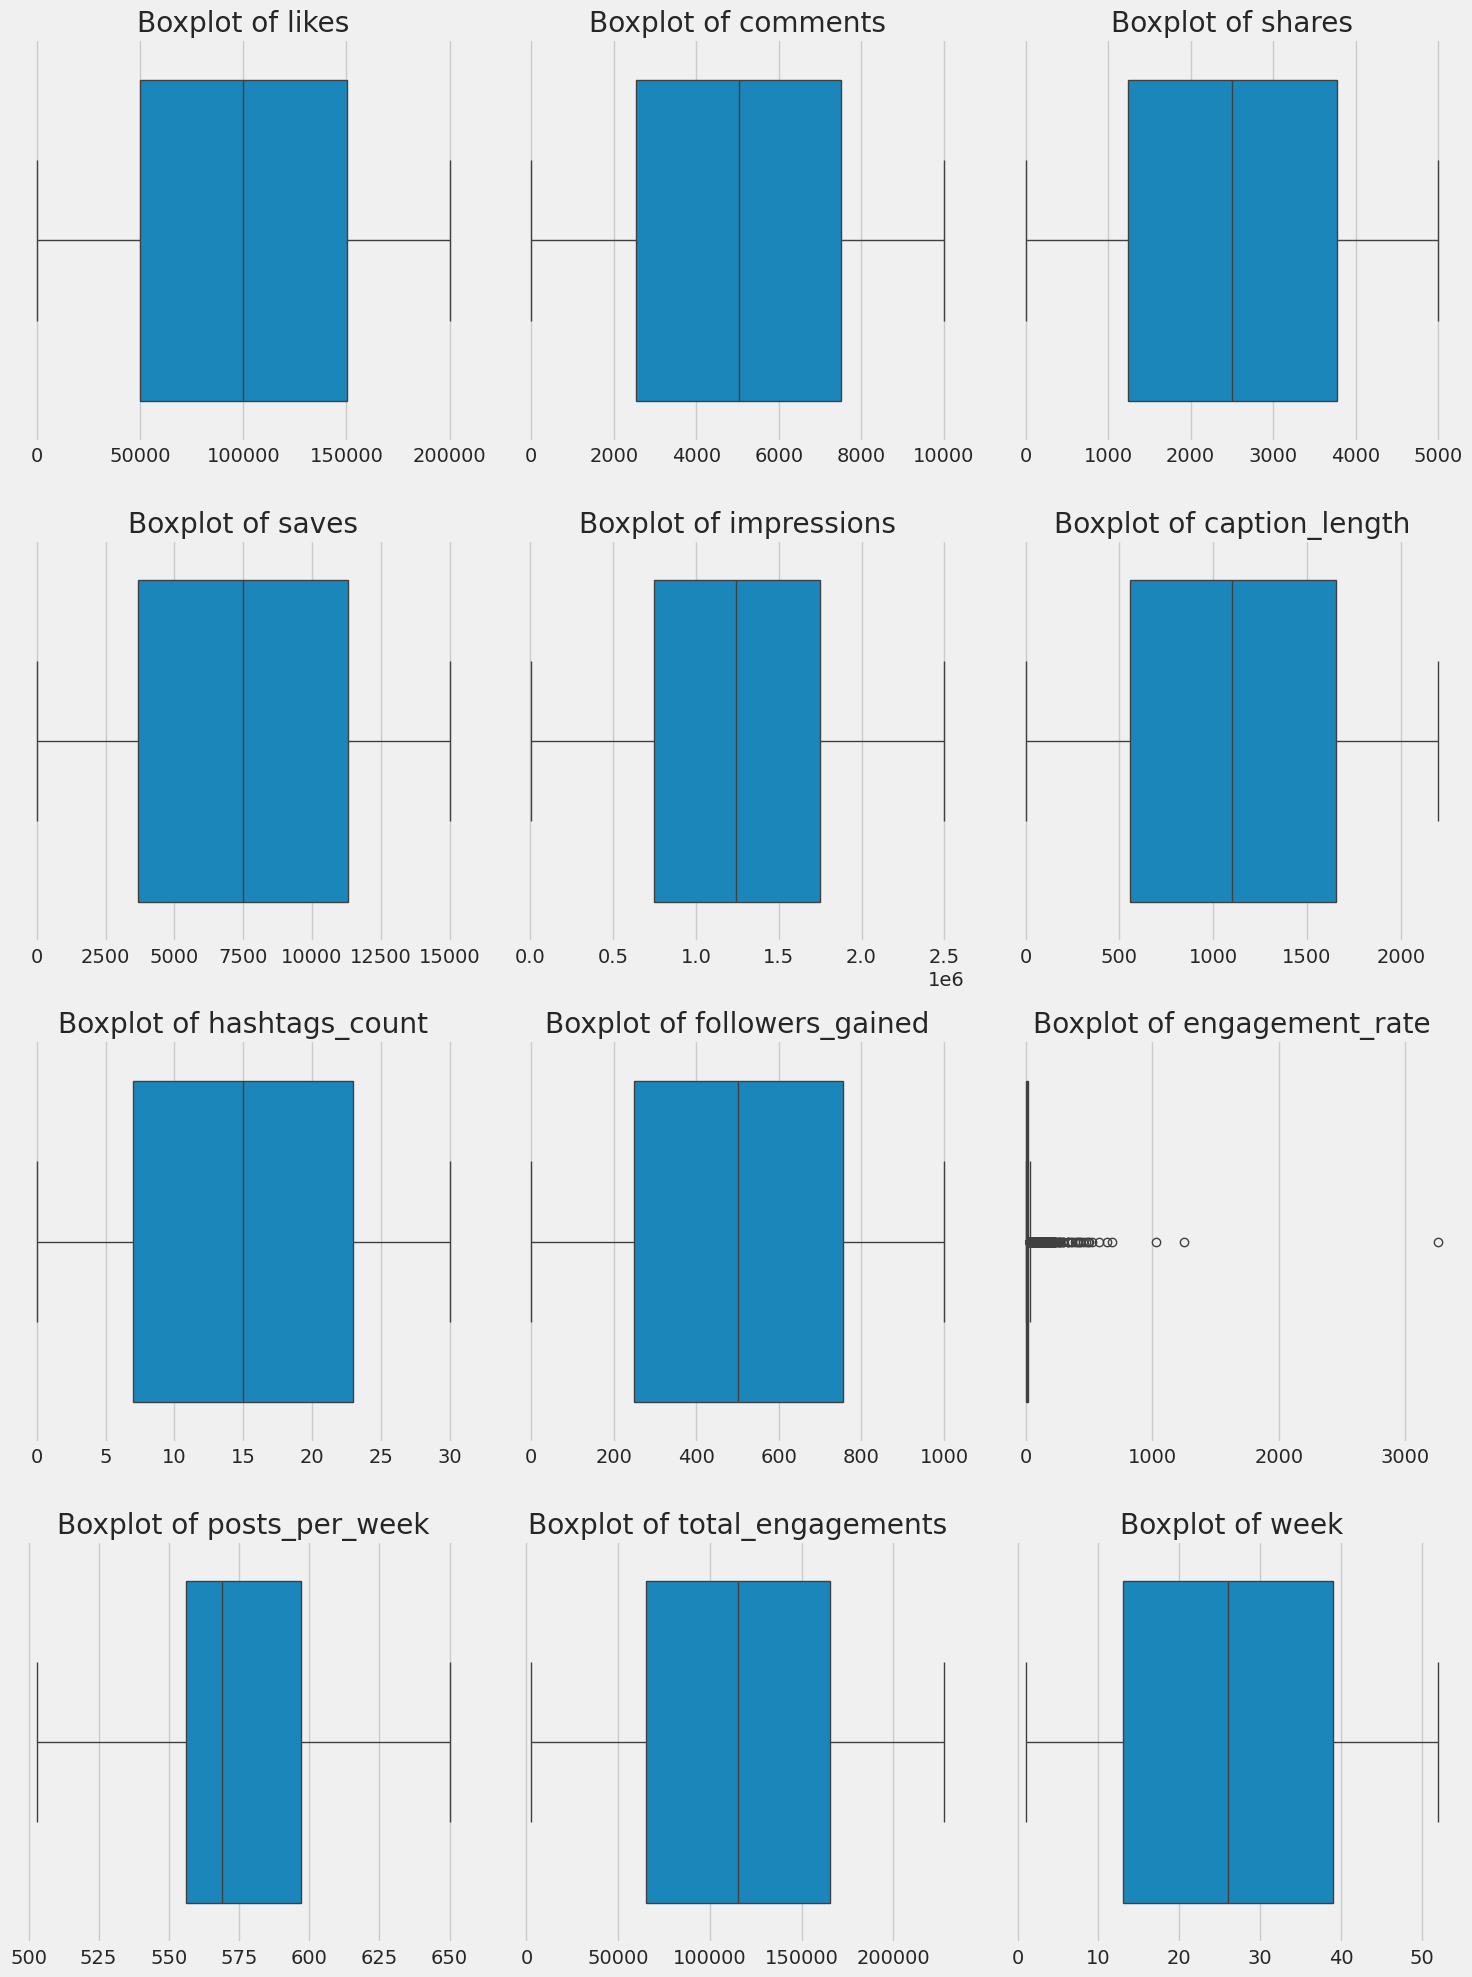

In [17]:
# Plotting boxplots for numerical columns to identify outliers
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns

# Set up number of columns per row
cols_per_row = 3
rows = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 5 * rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df_clean[col].dropna(), ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

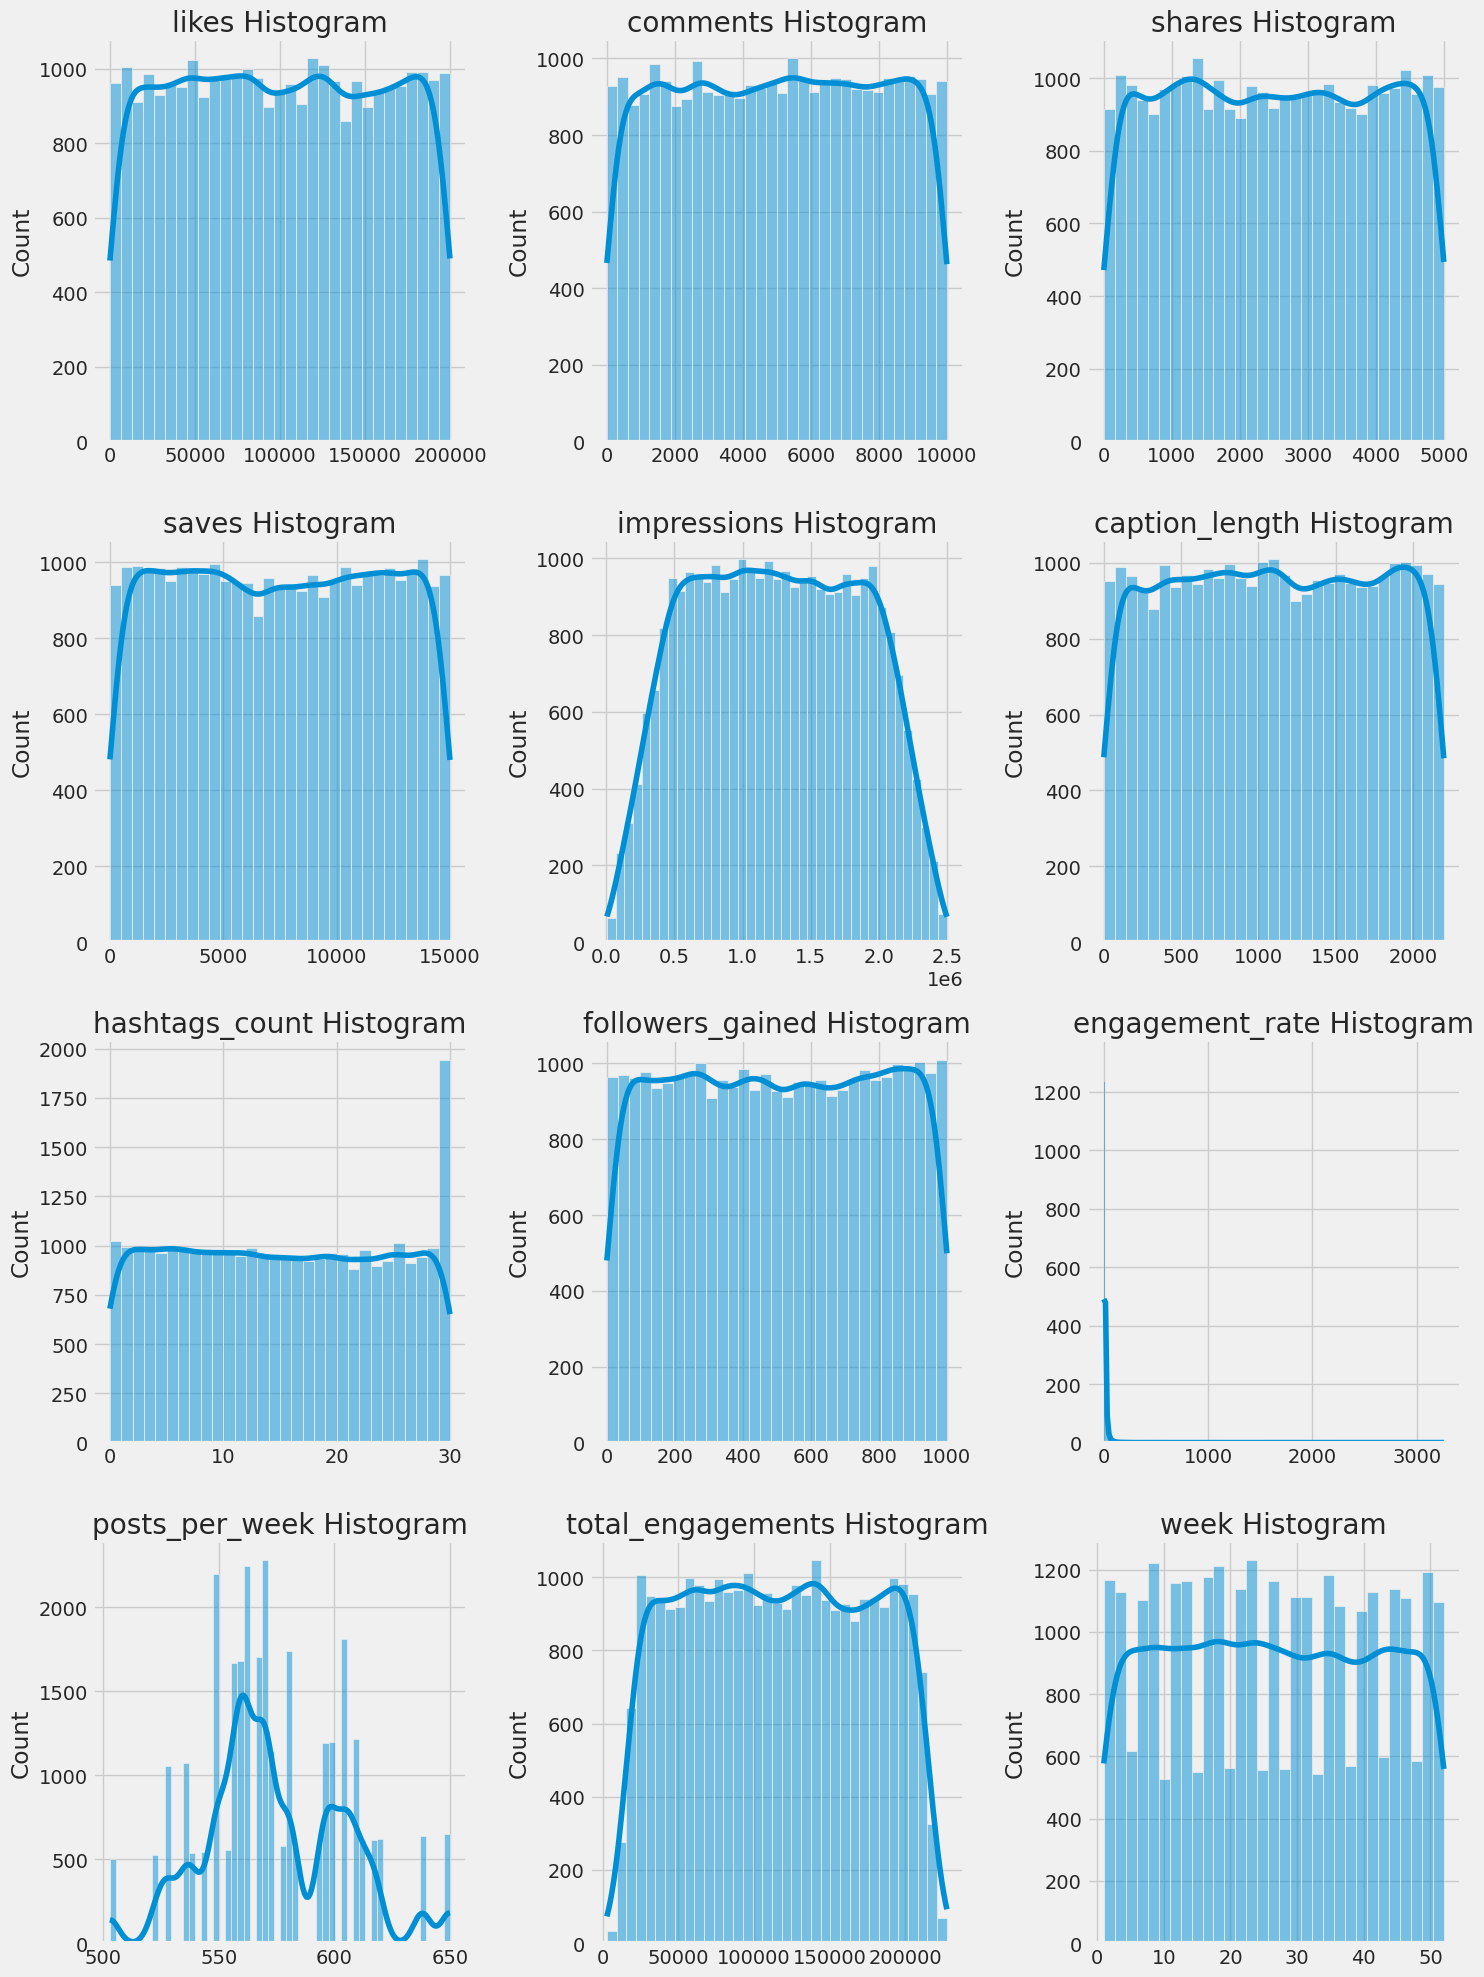

In [18]:
# Plotting Density Histograms for numerical columns
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns

# Set up number of columns per row
cols_per_row = 3
rows = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 5 * rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(numerical_cols):
    sns.histplot(x=df_clean[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Histogram')
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

> We can see that most of the features data are highly balanced , except for *"engagement_rate"*, which is one of our target variable, we cannot notice any harsh skewness or outliers and that is because the data is **synthetically** generated.
>  if the data is not synthetically generated, then the categorical data may not be balanced. In that case, based on the variable being a target or a feature, important to the analysis or not, we can either:
> 1. Balance the data by oversampling or undersampling the minority class.
> 2. Use a different evaluation metric that is less sensitive to class imbalance, such as F1-score or area under the precision-recall curve.
> 3. Grouping rare categories together.
> 4. Target encoding or dropping the feature.


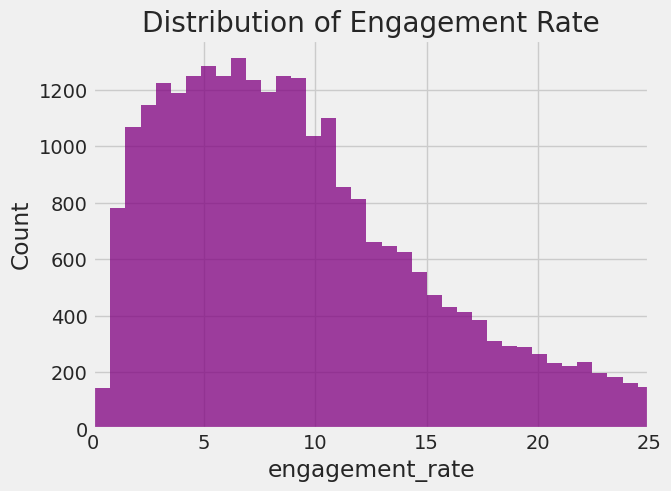

In [19]:
#Bar Chart: Top Hashtags (If hashtag analysis is complex, we stick to Engagement distribution)
# Let's plot the distribution of Engagement Rate

fig, ax = plt.subplots()
sns.histplot(df_clean['engagement_rate'], kde=False, ax=ax, color='purple')
ax.set_xlim(0, 25)
ax.set_title('Distribution of Engagement Rate')
plt.show()

>**As can be seen, the distribution is skewed to the right, but since this is our target variable, we do not need to apply normalization.**

Identifying Outliers:

* Based on these histograms, We need to inspect **engagement_rate** for outliers. Others seem to have normal distributions and statistical properties.

* Also, different scales for each feature is not an issue at this stage of analysis. We will normalize them later if needed.

<Axes: >

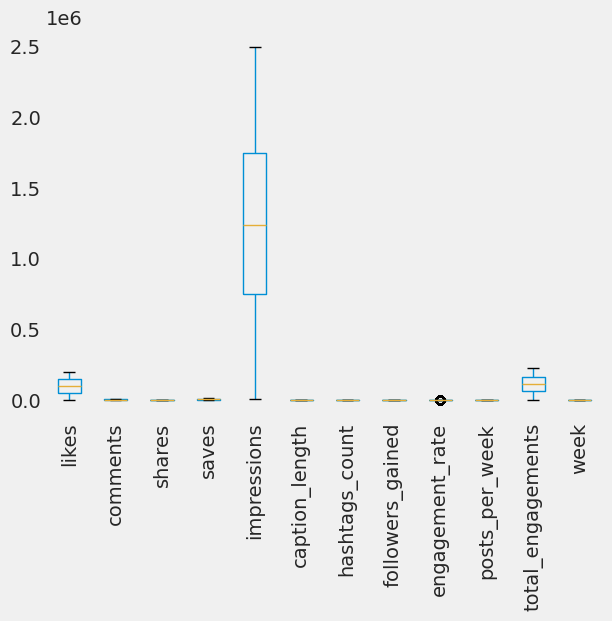

In [20]:
df_clean.boxplot(figsize=(15,10), rot=90, grid=False, ax=plt.gca())

<Axes: >

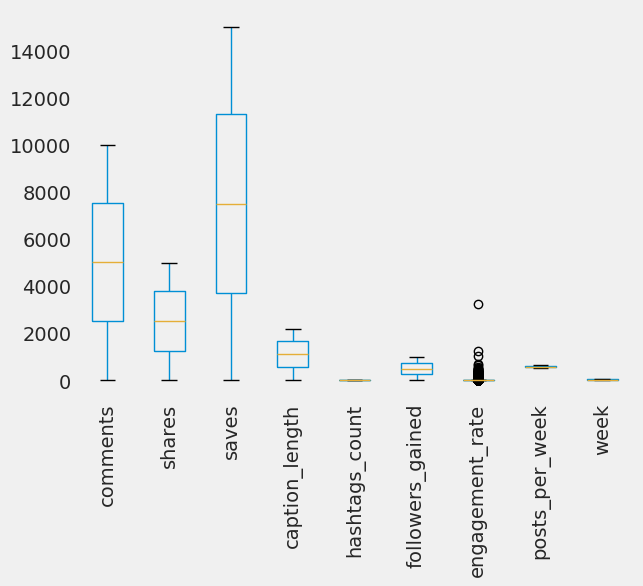

In [21]:
# To better visualize the boxplots for other features, we remove 'likes', 'reach', and 'impressions' columns
df_temp = df_clean.drop(columns=['likes', 'impressions', 'total_engagements'])
df_temp.boxplot(figsize=(15,10), rot=90, grid=False, ax=plt.gca())

<Axes: >

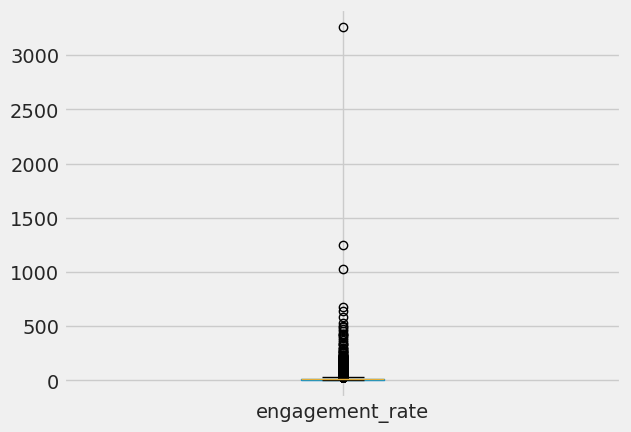

In [22]:
df_temp[['engagement_rate']].boxplot(figsize=(15,10), rot=0, grid=True, ax=plt.gca())

When analysing the target variable, we have to be very careful. We shouldn't normally drop any feature from the target value unless we are philosophically sure about it. In this case, we can see that we have three distinguishable outliers in the **engagement_rate** column. Therefore we can remove the entire rows safely.  
Furthermore, although the histogram of *engagement_rate* shows skewness, we do not need to perform any transformation such as logarithmic transformation at this stage.


In [23]:
outliers = df_clean[(df_clean['engagement_rate'] > 900)]
outliers

upload_date media_type   likes  comments  shares  saves  \
8968  2025-04-23 09:25:00      Video  156126      9259     668    426   
18577 2024-11-27 09:25:00   Carousel  185597      8539    2025   2581   
23797 2025-03-23 09:25:00       Reel  121134      8597    3004   2164   

       impressions  caption_length  hashtags_count  followers_gained  \
8968          5107            2079               0               261   
18577        19335            1070              21               269   
23797        10787            1723              14               311   

      traffic_source  engagement_rate content_category  posts_per_week  \
8968         Profile          3259.82           Beauty             608   
18577      Home Feed          1027.89            Music             584   
23797      Home Feed          1250.57          Fashion             598   

       total_engagements    weekday  week  
8968              166740  Wednesday    17  
18577             199011  Wednesday    48  
23797             135210     Sunday    12

In [24]:
df_final = []
df_final = df_clean[(df_clean['engagement_rate'] < 900)]

<Axes: >

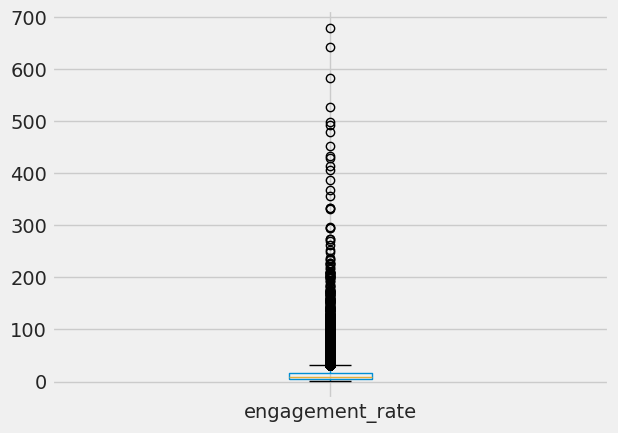

In [25]:
df_final[['engagement_rate']].boxplot(figsize=(15,10), grid=True, ax=plt.gca())

In [26]:
# To double check, we check the info of cleaned dataframe
df_final.reset_index(drop=True, inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29756 entries, 0 to 29755
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   upload_date        29756 non-null  datetime64[ns]
 1   media_type         29756 non-null  category      
 2   likes              29756 non-null  int64         
 3   comments           29756 non-null  int64         
 4   shares             29756 non-null  int64         
 5   saves              29756 non-null  int64         
 6   impressions        29756 non-null  int64         
 7   caption_length     29756 non-null  int64         
 8   hashtags_count     29756 non-null  int64         
 9   followers_gained   29756 non-null  int64         
 10  traffic_source     29756 non-null  category      
 11  engagement_rate    29756 non-null  float64       
 12  content_category   29756 non-null  category      
 13  posts_per_week     29756 non-null  int64         
 14  total_

>In reality, engagement metrics do not carry the **same weights**. For example, a comment is much more impactful than a like, and a share is even more impactful than comments.  
For EDA stage, it is not necessary to apply the weighting, since the in a linear correlation analysis, the weights of the features are not important.  
For reference, a practical, research-aligned weighting is:

>
**likes = 1 comments = 2 saves = 3 shares = 4 followers_gained = 5**

## B. Multivariate Analysis

Next, we examine how different metrics relate to each other. Key questions include:
- How strongly do impressions and reach relate to engagement?
- Do certain post types consistently outperform others?
- Are there temporal patterns (e.g., weekdays) that align with higher reach or engagement?

This section will use scatter plots, box plots, and group-based summaries.


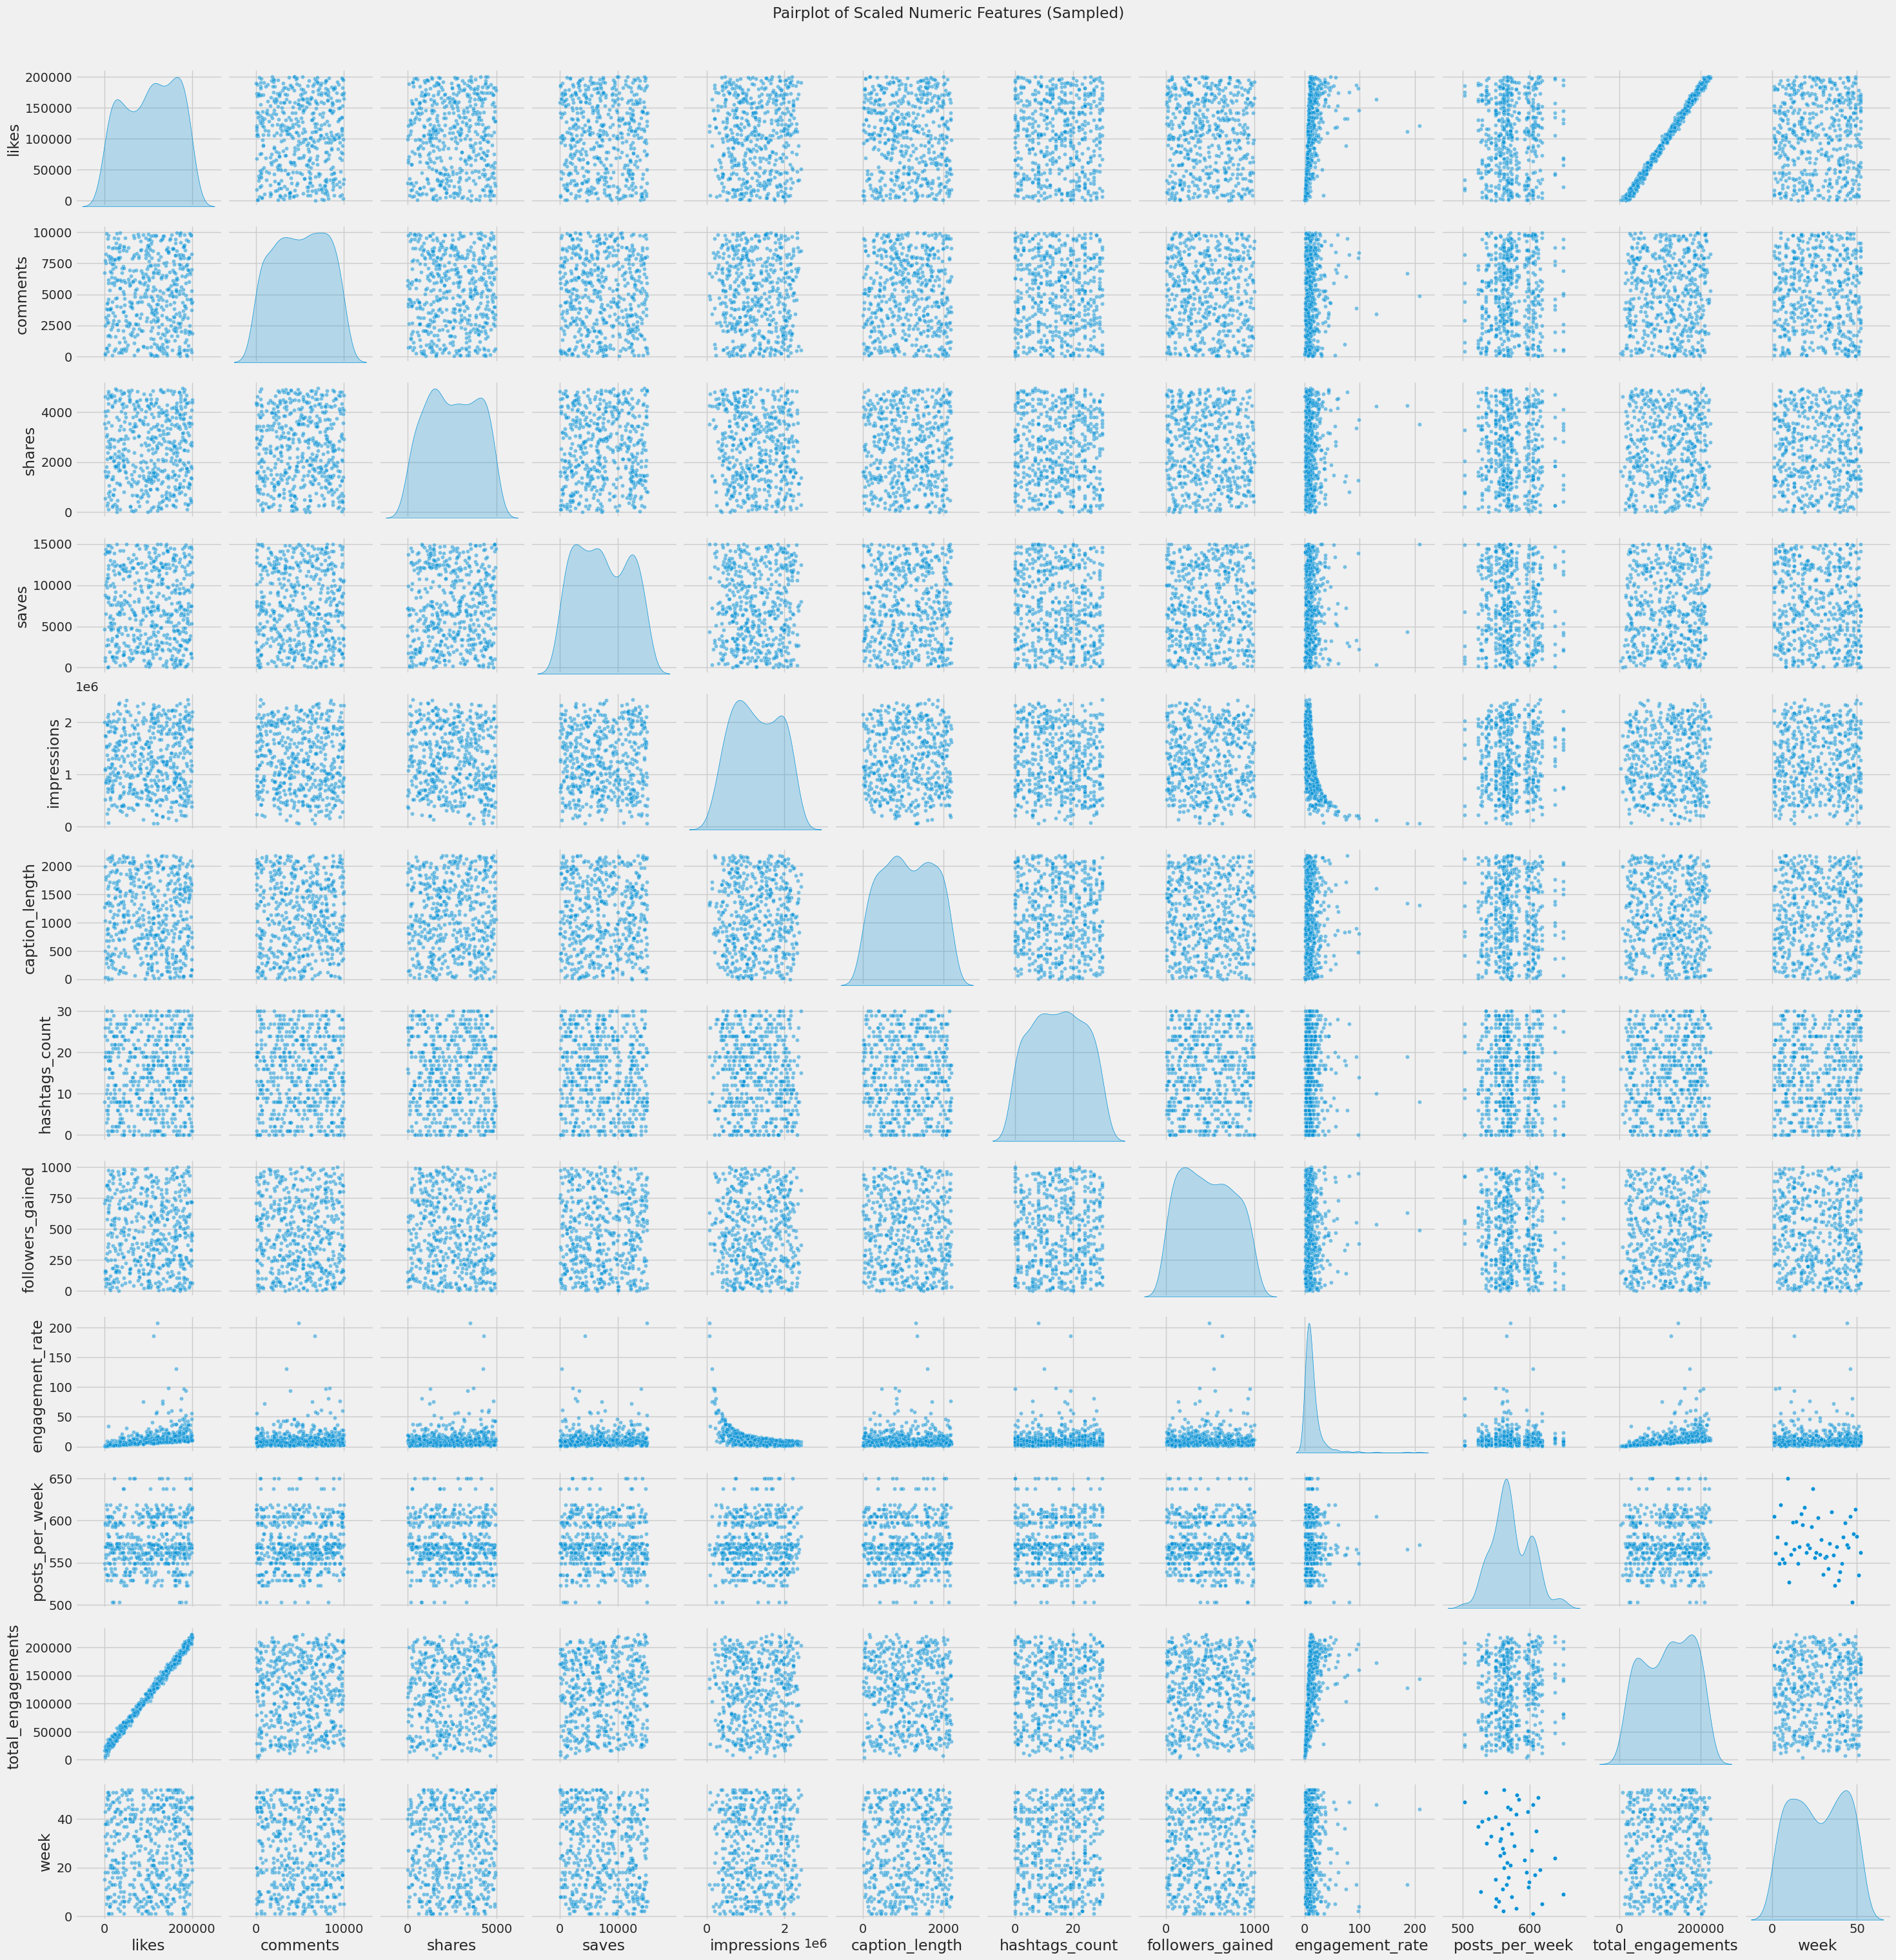

In [27]:
numeric_cols = df_final.select_dtypes(include=[np.number]).columns
df_numeric = pd.DataFrame(df_final, columns=numeric_cols)
sns.pairplot(df_numeric.sample(500), diag_kind='kde', plot_kws={'alpha':0.5, 's':20})
plt.suptitle("Pairplot of Scaled Numeric Features (Sampled)", y=1.02)
plt.show()

## Correlation Analysis

To quantify how metrics move together, we calculate a correlation matrix among numeric variables (likes, comments, shares, saves, impressions, reach, engagement rate, etc.). This helps us identify which variables are most tightly tied to growth-related outcomes.


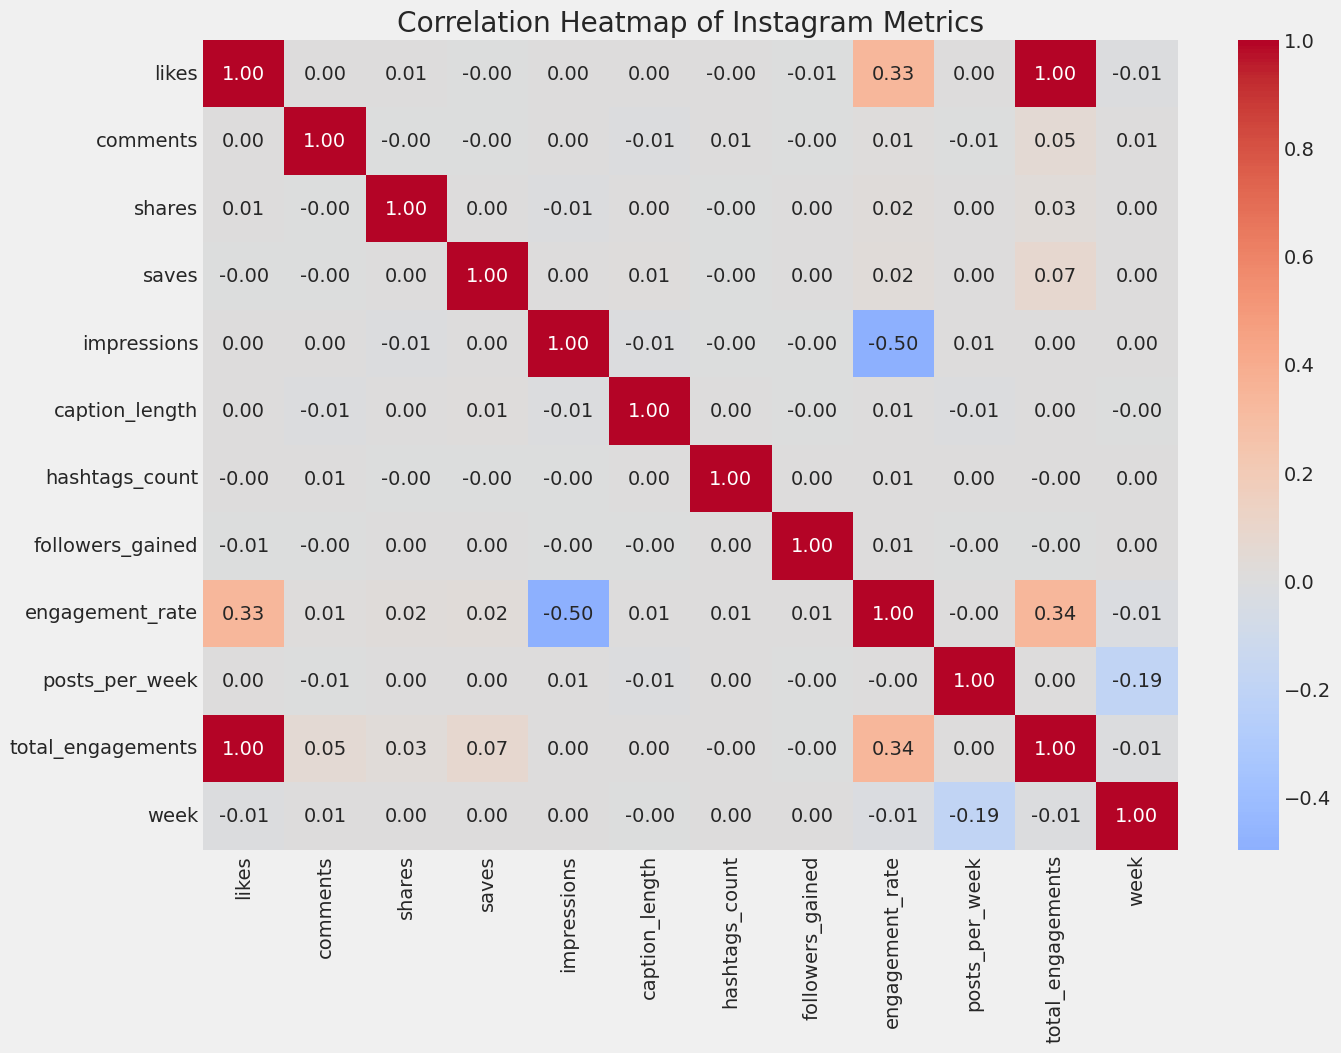

In [28]:
# Visualizing which features have the most influence on engagement rate using correlation heatmap
corr = df_final[numeric_cols].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Instagram Metrics")
plt.show()

In terms of continus numeric values, the only significant linear correlation is between **likes** + **impressions** and **engagement_rate**.

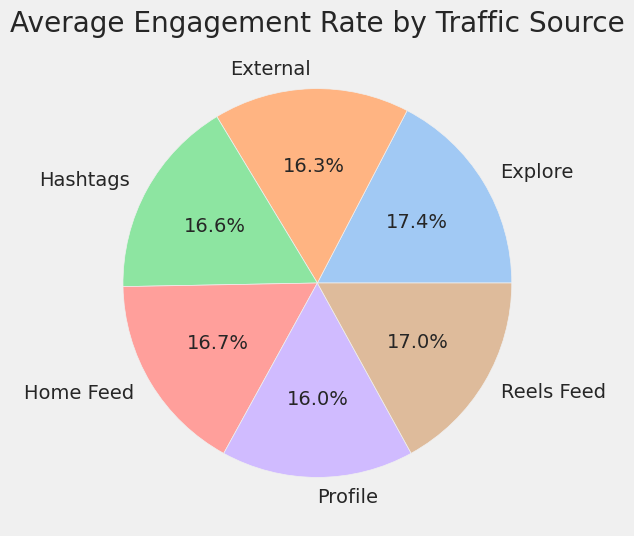

In [29]:
# Aggregate numerical values
agg = df_final.groupby('traffic_source')['engagement_rate'].mean()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(agg, labels=agg.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Average Engagement Rate by Traffic Source')
plt.show()

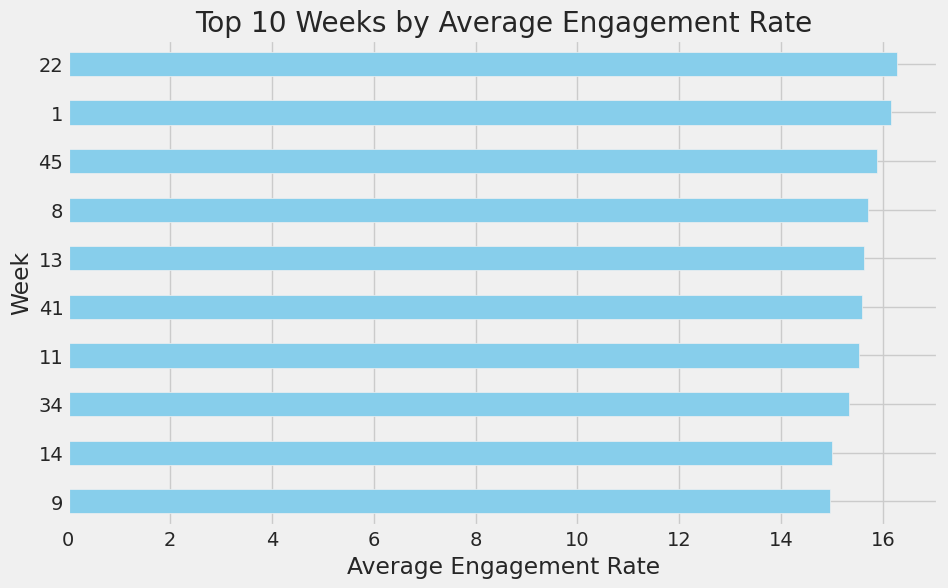

In [30]:
# We can see that weekdays and trrafic source have insignificant impact on impressions and engagement.
# For the week number, we will plot the top 10 weeks with highest engagement_rate to see if we can find valuable insights.

# Group by week and calculate mean engagement rate
week_summary = df_final.groupby('week')['engagement_rate'].mean()
    
# Get top 10 weeks by engagement rate
top10_weeks = week_summary.sort_values(ascending=False).head(10)
    
# Plot horizontal bar chart
top10_weeks.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.xlabel('Average Engagement Rate')
plt.ylabel('Week')
plt.title('Top 10 Weeks by Average Engagement Rate')
plt.gca().invert_yaxis()  # Optional: highest at the top
plt.show()

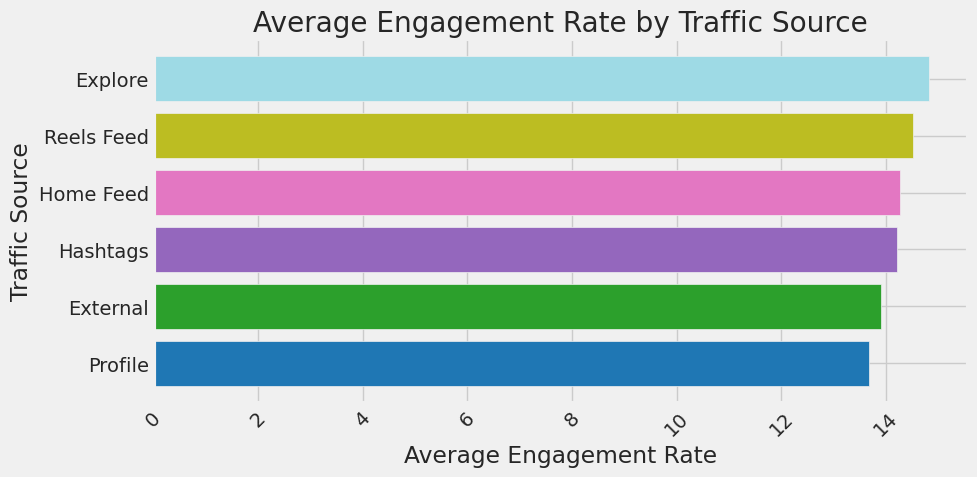

In [31]:
# Sum + sort categories
top_categories = (
    df_final.groupby('traffic_source')['engagement_rate']
      .mean()
      .sort_values(ascending=True)
)

# Generate a distinct color for each bar
colors = plt.cm.tab20(np.linspace(0, 1, len(top_categories)))

plt.figure(figsize=(10,5))
plt.barh(top_categories.index, top_categories.values, color=colors)
plt.title("Average Engagement Rate by Traffic Source")
plt.xlabel("Average Engagement Rate")
plt.ylabel("Traffic Source")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Plotly Dashboard ###

In [ ]:
!pip install jupyter-dash

In [43]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

agg_df = (
    df_final
    .groupby(["traffic_source", "content_category"], as_index=False)["engagement_rate"]
    .mean()
    .rename(columns={"engagement_rate": "avg_engagement_rate"})
)

traffic_sources = sorted(agg_df["traffic_source"].unique().tolist())
content_categories = sorted(agg_df["content_category"].unique().tolist())

traffic_widget = widgets.SelectMultiple(
    options=traffic_sources,
    value=tuple(traffic_sources),
    description="Traffic:",
    layout=widgets.Layout(width="45%"),
)

category_widget = widgets.SelectMultiple(
    options=content_categories,
    value=tuple(content_categories),
    description="Category:",
    layout=widgets.Layout(width="45%"),
)

barmode_widget = widgets.RadioButtons(
    options=[
        ("Grouped", "group"),
        ("Stacked", "stack"),
    ],
    value="group",
    description="Bar mode:",
)

def update_chart(traffic, categories, barmode):
    filtered = agg_df.copy()

    if traffic:
        filtered = filtered[filtered["traffic_source"].isin(traffic)]

    if categories:
        filtered = filtered[filtered["content_category"].isin(categories)]

    fig = px.bar(
        filtered,
        x="traffic_source",
        y="avg_engagement_rate",
        color="content_category",
        barmode=barmode,
        labels={
            "traffic_source": "Traffic Source",
            "avg_engagement_rate": "Average Engagement Rate",
            "content_category": "Content Category",
        },
        title="Average Engagement Rate by Traffic Source and Content Category",
    )

    fig.update_layout(
        xaxis_tickangle=-30,
        legend_title_text="Content Category",
    )

    fig.show()

output = widgets.interactive_output(
    update_chart,
    {
        "traffic": traffic_widget,
        "categories": category_widget,
        "barmode": barmode_widget,
    },
)

controls = widgets.VBox([
    widgets.HBox([traffic_widget, category_widget]),
    barmode_widget,
])

display(
    widgets.VBox([
        widgets.HTML("<h2>Average Engagement Rate by Traffic Source and Content Category</h2>"),
        controls,
        output,
    ])
)

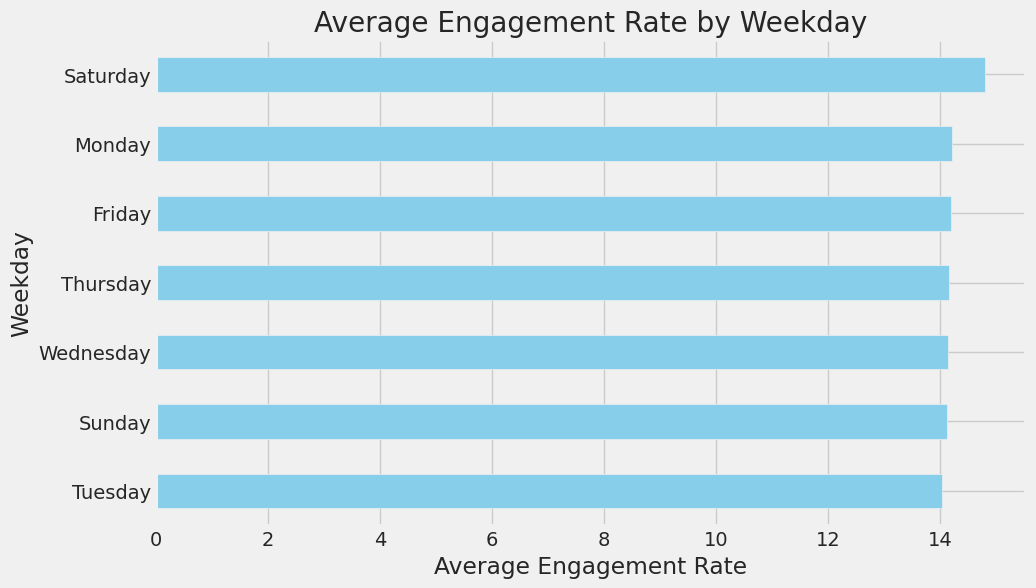

In [44]:
# Let's now visualize if week days have any impact on engagement rate.

# Group by weekday and calculate mean engagement rate
weekday_summary = df_final.groupby('weekday')['engagement_rate'].mean().sort_values(ascending=False)
    
# Plot horizontal bar chart
weekday_summary.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.xlabel('Average Engagement Rate')
plt.ylabel('Weekday')
plt.title('Average Engagement Rate by Weekday')
plt.gca().invert_yaxis()  # Optional: highest at the top
plt.show()

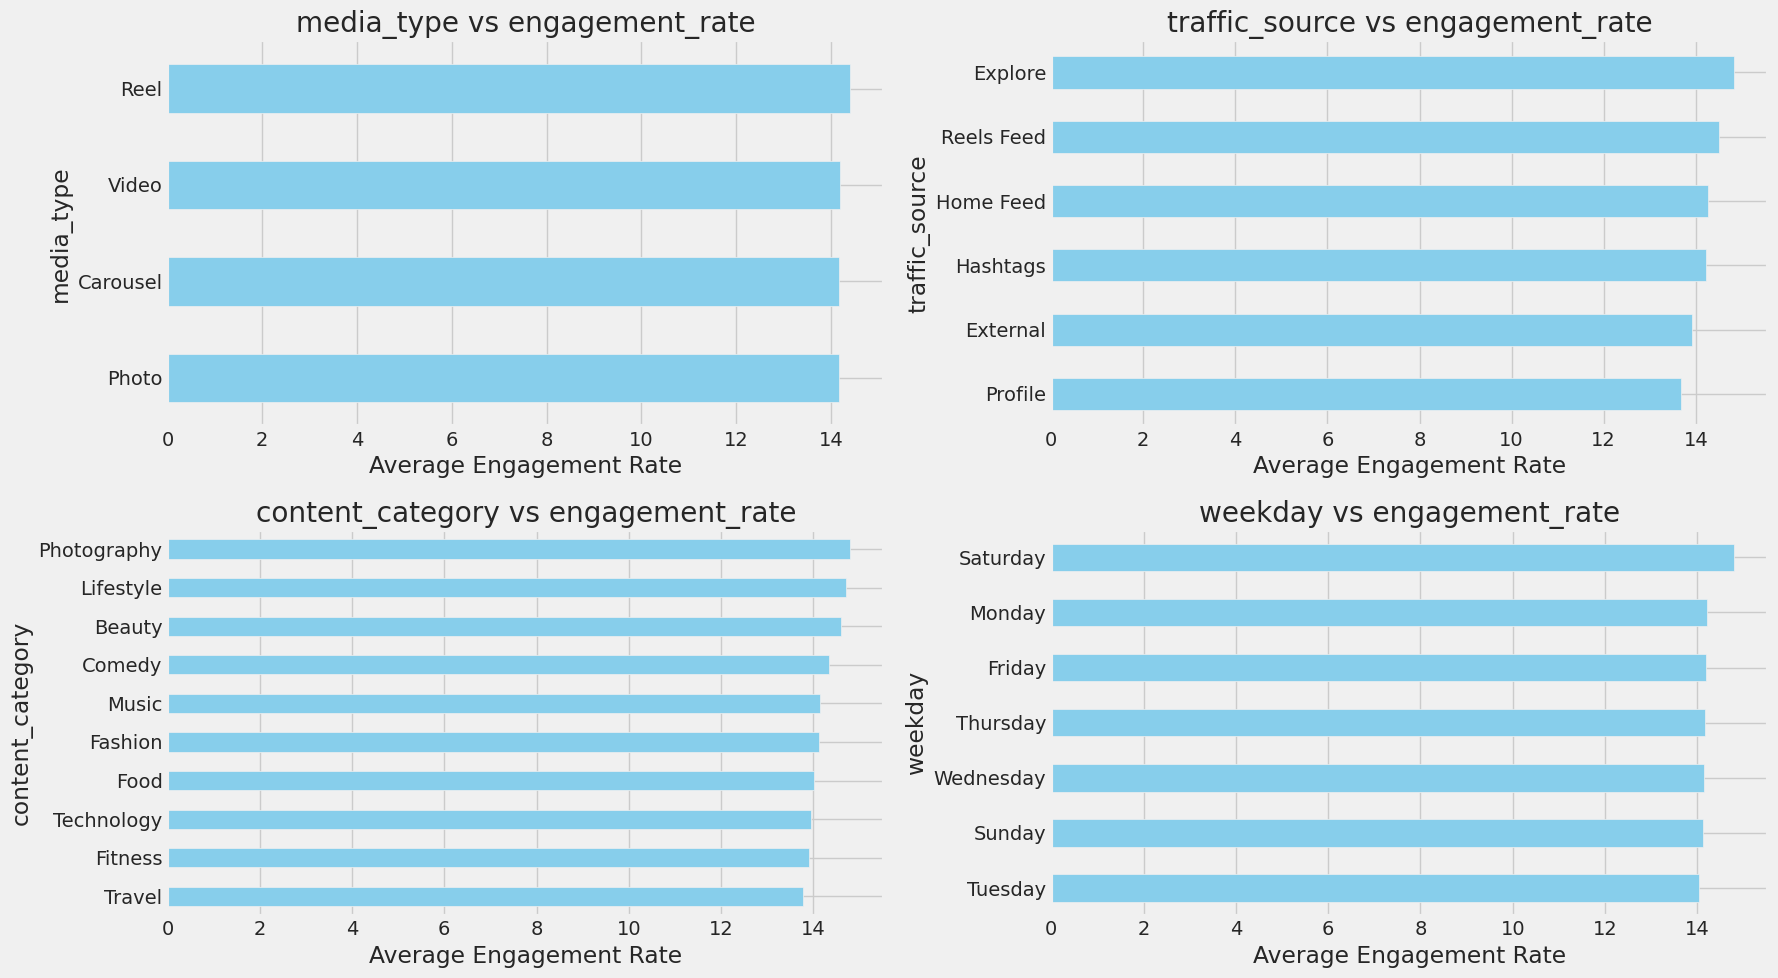

In [46]:
import math

# Define target and categorical features
target = 'engagement_rate'
categorical_cols = df_final.select_dtypes(include=['category', 'object']).columns.tolist()

# Set layout: 3 plots per row
n_cols = 2
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # flatten in case we have multiple rows

for i, col in enumerate(categorical_cols):
    # Group by categorical column and calculate mean engagement_rate
    summary = df_final.groupby(col)[target].mean().sort_values()
    
    # Horizontal bar plot
    summary.plot(kind='barh', ax=axes[i], color='skyblue')
    axes[i].set_xlabel('Average Engagement Rate')
    axes[i].set_title(f'{col} vs {target}')

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Relationship Insights

- Impressions and likes show a strong positive relationship: posts that reach more people tend to earn more likes, though a few posts appear “overperforming” with higher likes relative to impressions.
- Engagement rate does not necessarily increase with impressions, suggesting that some posts reach many people but fail to deeply engage them.
- [If applicable] Carousel/Reels/Stories posts (Post Type) exhibit higher average impressions and reach compared to single-image posts, indicating that format choice influences discovery and growth.
- Weekday analysis shows that posts on [top weekdays you see] tend to deliver higher average reach and engagement rate, hinting at optimal posting windows.

These patterns help define which levers (content format, timing, engagement quality) may drive growth trend over time.

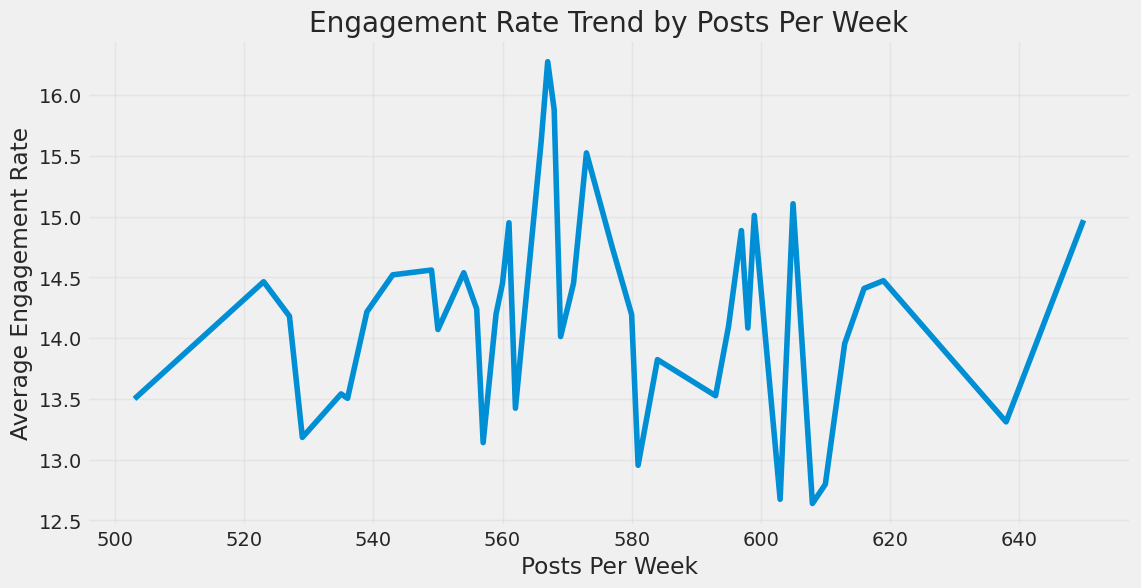

In [48]:
# Calculate average engagement rate per post per week
week_trend = df_final.groupby('posts_per_week')['engagement_rate'].mean().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=week_trend)

plt.title('Engagement Rate Trend by Posts Per Week')
plt.xlabel('Posts Per Week')
plt.ylabel('Average Engagement Rate')
plt.grid(True, alpha=0.3)

plt.show()

**There is no actual trend in the engagement rate per week. It has so much fluctuation. But we need to consider the low and high peaks as they might indicate some important events or changes in the system. They might relate to special events or occurances in the calendar.**

>>Quick check for you
In your notebook, after implementing these steps, try answering in a short Markdown cell:

>Which 2–3 variables seem most important for growth (based on trends and correlations)?

>Are there clear “best” weekdays or post types for performance?

>Does performance (impressions/reach/engagement) appear to be improving over time?

Step 9: Hypothesis Testing
We’ll cover:

One numeric metric vs categories (e.g., Engagement Rate by Weekday)

One numeric vs two groups (e.g., Engagement Rate: Weekend vs Weekday)

At the end:
1. It is adviasble to check the <*engagement_rate*> **outliers** dataset and perform analysis  
 on them as they might include some valuable insights and to see if any trend or correlation changes.

# FUTURE RECOMMENDATION


1. We can connect to the Instagram "Insights API" to build a data ingestion pipeline.
2. To further increase the accuracy and insights from Instagram analytics, every post should be analysed based on their duration, catching  phrases, hashtag content, background sounds, captions, and any other relevant elements.
3. Implement sentiment analysis to gauge the overall sentiment of the posts and their impact on engagement.
4. As we saw, the relationship between features impacting target variable is probably not linear. We need to use non-linear models to capture the complex relationships.
5. We can do binning on engagement rate to see if the correlations make more sense.
6. To statistically prove the results, we can perform hypothesis testing before going further and building ML models.



## BELOW IS ML MODELING PART

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# X = features, y = engagement_rate
X = df_no_outliers[["likes_w", "comments_w", "shares_w", "saves_w", "followers_gained_w"]]
y = df_no_outliers["engagement_rate"]

# optional: standardize so coefficients are comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

In [ ]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)   
print("R2 Score:", model.score(X_test, y_test))
print(" Mean Squared Error:", np.mean((model.predict(X_test) - y_test) ** 2))

In [ ]:
# Now we will go with Random Forest Classifier to see feature importances
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# 1. Select Features
features = ['likes_w', 'comments_w', 'shares_w', 'saves_w', 'followers_gained_w']
X = df_no_outliers[features]
y = df_no_outliers['growth_category']
# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 3. Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# 4. Evaluate Model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Feature Importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importance_df)
